In [16]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [1]:
!ls Vehicle_Dataset_From_CarDekho

'car data.csv'	'CAR DETAILS FROM CAR DEKHO.csv'


In [2]:
path = 'Vehicle_Dataset_From_CarDekho/CAR DETAILS FROM CAR DEKHO.csv'

In [3]:
import pandas as pd

In [4]:
data_ini = pd.read_csv(path)

In [5]:
data = data_ini.copy()

In [6]:
data.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [7]:
fdf = data[['year', 'km_driven','fuel', 'seller_type', 'transmission', 'owner','selling_price']]
fdf.head()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [8]:
for i in ['fuel', 'seller_type', 'transmission', 'owner']:
    print("for column {0}".format(i))
    print(fdf[i].value_counts())
    print("\n")

for column fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


for column seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


for column transmission
Manual       3892
Automatic     448
Name: transmission, dtype: int64


for column owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64




In [9]:
X=fdf.values
x=X[:,0:6]
y=X[:,6]

In [10]:
from sklearn import preprocessing

In [11]:
f=preprocessing.LabelEncoder()
f.fit(['Petrol','Diesel','CNG','LPG','Electric'])
x[:,2]=f.transform(x[:,2])


s=preprocessing.LabelEncoder()
s.fit(['Individual','Dealer','Trustmark Dealer'])
x[:,3]=s.transform(x[:,3])

t=preprocessing.LabelEncoder()
t.fit(['Manual','Automatic'])
x[:,4]=t.transform(x[:,4])

o=preprocessing.LabelEncoder()
o.fit(['Test Drive Car','First Owner' ,'Second Owner', 'Third Owner','Fourth & Above Owner' ])
x[:,5]=o.transform(x[:,5])

In [12]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain1,xtest1,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=3)

### Linear Regression

In [17]:
xtrain1,xtest1,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=3)
print(xtrain1.shape,ytrain.shape,xtest1.shape,ytest.shape)
poly=PolynomialFeatures(degree=2)
xtrain=poly.fit_transform(xtrain1)
xtest=poly.fit_transform(xtest1)

(3906, 6) (3906,) (434, 6) (434,)


In [18]:
Lr2=linear_model.LinearRegression()
Lr2.fit(xtrain1,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R2 score : 0.5472635818485425


<AxesSubplot:>

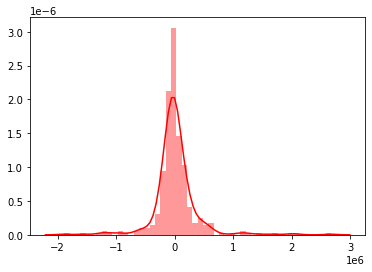

In [19]:
Lr=linear_model.LinearRegression()

Lr.fit(xtrain,ytrain)

yhat1=Lr.predict(xtest)

print("R2 score :",r2_score(ytest,yhat1))

sns.distplot(ytest-yhat1, color='red')

R2 score : 0.5486291193302262


<AxesSubplot:>

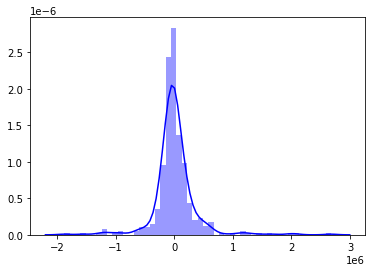

In [20]:
Br=linear_model.BayesianRidge()
Br.fit(xtrain,ytrain)
yhat2=Br.predict(xtest)
print("R2 score :",r2_score(ytest,yhat2))
sns.distplot(ytest-yhat2, color='blue')

R2 score : 0.5472668451465078


/home/pramila/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2614722863750.4375, tolerance: 132548936550.64139
  positive)


<AxesSubplot:>

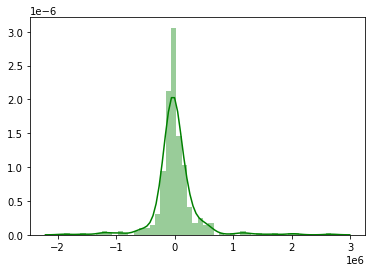

In [21]:
L=linear_model.Lasso(alpha=0.2)
L.fit(xtrain,ytrain)
yhat3=L.predict(xtest)
print("R2 score :",r2_score(ytest,yhat3))
sns.distplot(ytest-yhat3, color='green')

R2 score : 0.5472942921890607


<AxesSubplot:>

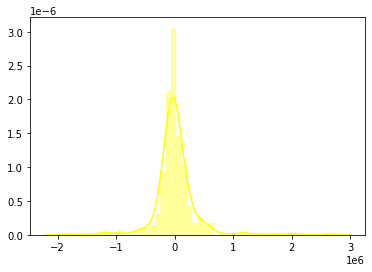

In [22]:
R=linear_model.Ridge(alpha=.5)
R.fit(xtrain,ytrain)
yhat4=R.predict(xtest)
print("R2 score :",r2_score(ytest,yhat4))
sns.distplot(ytest-yhat4, color='yellow')

In [23]:
importance = abs(Lr2.coef_)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' %(i,v))

Feature: 0, Score: 153451.62001
Feature: 1, Score: 49069.32507
Feature: 2, Score: 140501.31720
Feature: 3, Score: 20144.59170
Feature: 4, Score: 266949.61983
Feature: 5, Score: 19731.41571


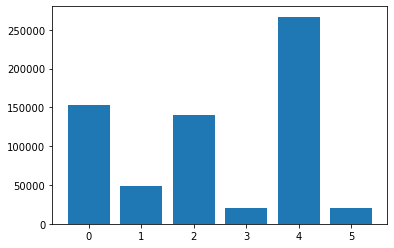

In [24]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()